In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

#Reg
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_squared_error, precision_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix




In [2]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

In [3]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [4]:
# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

#Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [5]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(208, 33) (52, 33) (208,) (52,)


In [6]:
#Tuned KNN
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform').fit(X_train, y_train)
y_pred = knn.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0,0.0,1.0
row_0,,
0.0,45,0
1.0,3,4


In [7]:
evaluateBinaryClassification(y_pred,y_test)

(0.9423076923076923, 0.5714285714285714, 1.0, 0.7272727272727273)

In [8]:
Methods = ['KNN']
Metrics = ['Accuracy','Recall','Precision','Fscore']

compare_df = pd.DataFrame(index = Methods, columns = Metrics)

#Method1 #KNN

compare_df.loc['KNN'] = evaluateBinaryClassification(y_pred,y_test)

number_Yes =  np.sum(y_pred==1)
compare_df

,Accuracy,Recall,Precision,Fscore
KNN,0.942308,0.571429,1.0,0.727273


Confusion Matrix:
 [[45  0]
 [ 3  4]]
Accuracy: 0.9423076923076923
Recall Score (Macro) 0.7857142857142857
Recall Score (Default) 0.5714285714285714
Precision Score (Macro) 0.96875
Precision Score (Default) 1.0
F1 Score (Macro): 0.8475073313782991
F1 Score (Default): 0.7272727272727273
ROC_AUC Score 0.7857142857142857


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


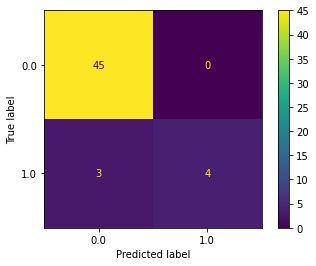

In [9]:
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

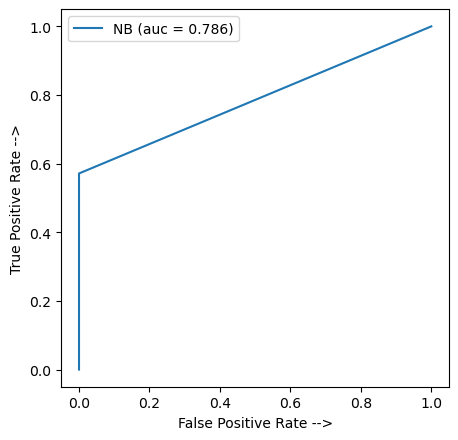

In [10]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='NB (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


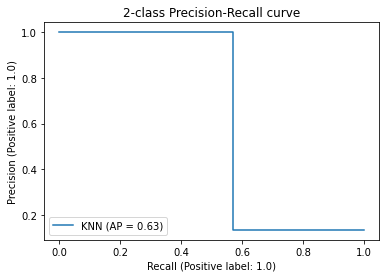

In [11]:
#AP = Average precision
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    knn, X_test, y_test, name="KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [12]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Confusion Matrix:
 [[45  0]
 [ 3  4]]
Accuracy: 0.9423076923076923
Recall Score (Macro) 0.7857142857142857
Recall Score (Default) 0.5714285714285714
Precision Score (Macro) 0.96875
Precision Score (Default) 1.0
F1 Score (Macro): 0.8475073313782991
F1 Score (Default): 0.7272727272727273
ROC_AUC Score 0.7857142857142857


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


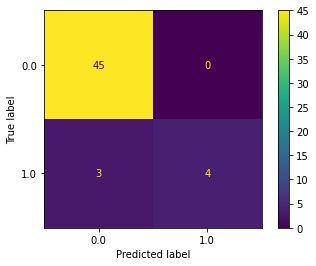

In [13]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(grid_search, X_test, y_test)  
plt.show()

In [14]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

TypeError: 'numpy.float64' object is not callable

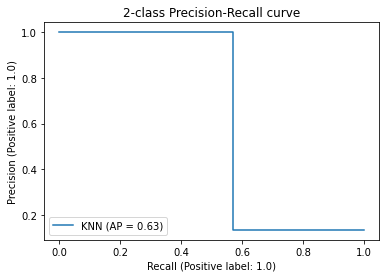

In [16]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_search, X_test, y_test, name="KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")